## assignment 5

## Finite Difference Schemes for the Heat Equation



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import time

## Programming Tasks

### Exercise 1
1.Write a Python function that returns the analytical solution to the PDE. 	
2.Implement an explicit finite difference scheme to approximate the PDE above. Use the following boundary conditions: 
\begin{align*}
	u(\tau, 0) & = u (\tau, 1) = 0, \textrm{ i.e., }&  u_{\ell, 0} & = u_{\ell, m} = 0 \, \, \forall \ell = 1, \ldots, \ell_{\max}, \\
	u(0, x) & =  \sin( \pi x) \textrm{ i.e., } & u_{0, i} & = \sin( \pi i \Delta x) \, \, \forall i=0, \ldots, m. 
\end{align*}
Recall that let $\lambda=\Delta \tau/(\Delta x)^2$,
\begin{align*}
	u_{\ell+1,i} = \lambda u_{\ell,i+1} + (1-2\lambda) u_{\ell,i} +
	\lambda u_{\ell,i-1} , \quad \text{for } \ell = 0, \ldots ,
	\ell_{\max}-1 \text{ and } i = 1, \ldots, m-1.  
\end{align*}
3.Choose $\Delta x = 0.1$ and $\Delta \tau = 0.0005$. Compute an approximation of $u$ at $(\tau, x)=(0.5, 0.2)$. Compare this to the analytic results. 

Hint: Note that here $x_2 = 2 \Delta x = 0.2$ and $\tau_{1000} = 1000 \Delta \tau = 0.5$.

### Exercise 1 - Solution
1.The function below returns the analytical function value of the PDE for given time parameter $t$ and space parameter $x$. 

In [2]:
def analytical_solution(t, x):
    functionvalue = np.exp(-math.pi ** 2 * t) * np.sin(math.pi * x)
    return functionvalue

print("Analytical result for u(0.5, 0.2) = ", analytical_solution(0.5, 0.2))

Analytical result for u(0.5, 0.2) =  0.00422728297276244


2. Next, we implement the exlicit finite difference scheme with the given boundary conditions. The function arguments are all parameters needed to specify the grid using the names from the lecture notes. The last two arguments, whichx and whichtau specify which point on the grid we would like to return. The function will return the approximate function value at this grid point and in addition the matrix (i.e., a 2-dimensional np.array), that contains all approximate function values on the grid up to the time point determined by whichtau.  Note that the first row corresponds to approximate solution at t=0.

In [3]:
def explicit_fd_matrix(deltatau, deltax, xmin, m, whichx, whichtau):
    # Define the last time index lmax 
    lmax = whichtau
    # Define the parameter lambda arising in the finite difference scheme
    # Don't call it lambda - since this is a keyword in Python!
    lam = deltatau / (deltax * deltax)
    # Create an np.array with lmax+1 rows and m+1 columns and set all values to 0
    allvalues = np.zeros((lmax + 1, m + 1))
    # Use the initial condition to determine the values at time 0
    # Store them at row index 0
    for i in range(m+1):
        allvalues[0, i] = np.sin(math.pi * (xmin + deltax * i))
        
    # Iterate in time from 1 * deltatau until whichtau * deltatau
    for l in range(1, lmax+1):
        # Iterate in space (interior grid points only)
        for i in range(1, m):
            # Below is the formula for the exlicit finite difference scheme
            newvalue = lam * allvalues[l- 1, i+1] + lam * allvalues[l-1, i-1] + (1.0 - 2.0 * lam) * allvalues[l- 1, i]
            allvalues[l, i] = newvalue
        # Boundaries (i.e., i=0 and i=m) are already set to zero!
    return allvalues[lmax, whichx], allvalues

In [4]:
def explicit_fd_matrix_MatVec(deltatau, deltax, xmin, m, whichx, whichtau):
    # Define the last time index lmax 
    lmax = whichtau
    # Define the parameter lambda arising in the finite difference scheme
    # Don't call it lambda - since this is a keyword in Python!
    lam = deltatau / (deltax * deltax)
    # Create an np.array with lmax+1 rows and m+1 columns and set all values to 0
    allvalues = np.zeros((lmax + 1, m + 1))
    # Use the initial condition to determine the values at time 0
    # Store them at row index 0
    for i in range(m+1):
        allvalues[0, i] = np.sin(math.pi * (xmin + deltax * i))
     
    # Create a tridiagonal matrix associated with the explciit FDM
    matrix_FDM= np.diag (np.ones(m-1)*(1.0 - 2.0 * lam),0) + np.diag (np.ones(m-2)* lam ,1) + np.diag (np.ones(m-2)* lam ,-1)
    # Iterate in time from 1 * deltatau until whichtau * deltatau
    for l in range(1, lmax+1):
        # Compute values at interior grid points only, use matrix-vector multiplication
        # Boundaries (i.e., i=0 and i=m) are already set to zero!
        allvalues[ l, 1:m]= matrix_FDM .dot(allvalues[l-1,1:m]) 
        
        
    return allvalues[lmax, whichx], allvalues

In [5]:
# Example: 
xmin = 0.0
deltax = 0.1
m = 10
whichx = 2
deltatau = 0.0005
whichtau = 1000


(approximation_point, matrix1) = explicit_fd_matrix(deltatau, deltax, xmin, m, whichx, whichtau)
(approximation_point2, matrix2) = explicit_fd_matrix_MatVec(deltatau, deltax, xmin, m, whichx, whichtau)



print("FD approximation (with looping) for u(0.5, 0.2) is ", approximation_point)
print("FD approximation (with vect.) for u(0.5, 0.2) is ", approximation_point2)
print("Analytical result for u(0.5, 0.2) is ", analytical_solution(0.5, 0.2))

FD approximation (with looping) for u(0.5, 0.2) is  0.004349220987439514
FD approximation (with vect.) for u(0.5, 0.2) is  0.004349220987439515
Analytical result for u(0.5, 0.2) is  0.00422728297276244


### Exercise 2
In this exercise you will be creating several heatmaps. Use the function heatmap available in the library seaborn for this. You can find more details and one example here: 	
https://seaborn.pydata.org/generated/seaborn.heatmap.html	

Consider the following model parameters: Choose $\Delta x = 0.1$ and $\Delta \tau = 0.0005$. Furthermore, set $m=10$, $\ell_{\max} = 1000$. 

1.Plot a heatmap of the matrix $a = (a_{\ell, i}) \in \mathbb{R}^{\ell_{\max} + 1, m+1}$, where for each $\ell \in \{0, \ldots, \ell_{\max}\}$, $i \in \{0, \ldots, m\}$,  
\begin{align*}
a_{\ell, i} = e^{- \pi^2 \tau_{\ell}} \sin(\pi x_i)
\end{align*}
and the same grid is used as for the finite difference scheme. 

2.Plot a heatmap of the matrix $u = (u_{\ell, i}) \in \mathbb{R}^{\ell_{\max} + 1, m+1}$ derived from your explicit finite difference scheme.  

3.Plot a heatmap of the matrix $a - u$, where $a$ is defined in abobe and hence represents the analytical solution and $u$ stores the approximate values from the explicit finite difference scheme. Discuss your results. 
	
### Exercise 2 - Solution

1.First, we write a function that computes the analytical results for all grid points. 

In [6]:
def analytical_matrix(deltatau, deltax, xmin, m, lmax):
    allvalues = np.zeros((lmax + 1, m + 1))
    # Iterate in time
    for l in range(0, lmax+1):
        currenttau = deltatau *l
        # Iterate in space (all grid points)
        for i in range(0, m+1):
            currentx = xmin + deltax *i
            newvalue = analytical_solution(currenttau, currentx)
            allvalues[l, i] = newvalue
    return allvalues

For more efficient implementation, you can apply the vectorization techinique (with numpy.meshgrid function) and compute the analytical results without looping. 

In [7]:
def analytical_matrix_meshgrid(deltatau, deltax, xmin, m, lmax):
    allvalues = np.zeros((lmax + 1, m + 1))
    
    x_values = np.linspace(xmin,  deltax*m, m+1, endpoint=True)
    t_values = np.linspace(0,  deltatau*lmax, lmax+1, endpoint=True)
    x_grid, t_grid  = np.meshgrid(x_values,t_values)
    allvalues = analytical_solution( t_grid, x_grid)
    
    return allvalues

In [8]:
# Example
# Choose model parameters
xmin = 0.0
deltax = 0.1
m = 10
whichx = 2
deltatau = 0.0005
whichtau = 1000
# Compute the analytical result
analytical_m = analytical_matrix_meshgrid(deltatau, deltax, xmin, m, whichtau)
# Compute the FD approximation
(approximation_point, matrix1) = explicit_fd_matrix(deltatau, deltax, xmin, m, whichx, whichtau)

In [9]:
# Create nice tick labels for the x-axis
my_xticks = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# We first create the tick labels for the y-axis as np.array 
my_yticks = np.round(np.linspace(0.0, whichtau*deltatau, whichtau +1),decimals=2)
# Next, we convert them to a list
my_yticks.tolist()
# We currently have far too many ticks on the y-axis. 
# We use list slicing to keep only a selection of the ticks.  
shortyticks = my_yticks[::int(len(my_yticks)/10)]
my_yticks = ['' for y in my_yticks]
my_yticks[::int(len(my_yticks)/10)] = shortyticks[::-1] # Reverse the list

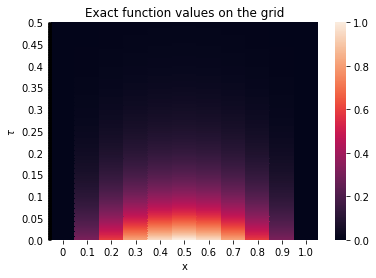

In [10]:
# Plot heatmap
fig, ax1 = plt.subplots(nrows=1, ncols=1)
# We flip the solution along the first axis, such that solution at t=0 is shown at the bottom
hmax1 = sns.heatmap(np.flip(analytical_m,axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax1)
hmax1.set_xlabel("x")
# If you directly print'$\rho$' here, then \r will be interpreted by Python as a carriage return. Using a raw string r'$\rho$'
hmax1.set_ylabel(r"$\tau$")
hmax1.set_title("Exact function values on the grid")
plt.show()

2.Second, we consider a heatmap of the finite difference approximation of the function values. 

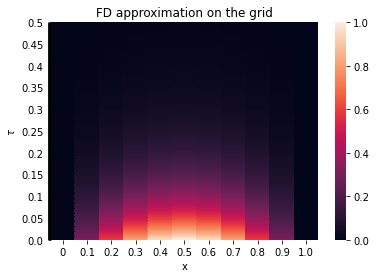

In [11]:
fig, ax2 = plt.subplots(nrows=1, ncols=1)
hm2ax = sns.heatmap(np.flip(matrix1,axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax2)
hm2ax.set_xlabel("x")
hm2ax.set_ylabel(r"$\tau$")
hm2ax.set_title("FD approximation on the grid")
plt.show()

3.Third, we consider a heatmap of the absolute error $|a - u|$. 

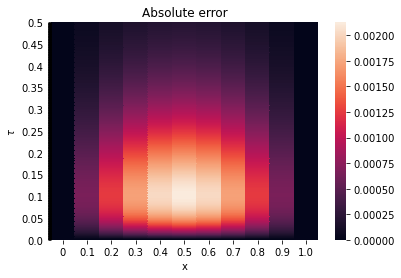

In [12]:
fig, ax3 = plt.subplots(nrows=1, ncols=1)
hm3ax = sns.heatmap(np.flip(np.absolute(analytical_m - matrix1),axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax3)
hm3ax.set_xlabel("x")
hm3ax.set_ylabel(r"$\tau$")
hm3ax.set_title("Absolute error")
plt.show()


Hence, we see that for our choice of grid, the explicit finite difference scheme provides a good approximation of the function values. In contrast to Monte Carlo approximations the error between the approximation and the true value is deterministic! It also gives approximate solutions at all grid points $(\tau, x)$ simultanously. Since the boundary conditions used coincide with the analytical exact values of the function, we see that the error at the left and right boundary and at the boundary where the initial condition is used is zero. 

Notet that we can not deduce that the approximation deviates most from the analytical results the lower to middle part of the grid, as the magnitude of true solution decreases at $\tau\to \infty$.

4. We further consider a heatmap of the relative error $|a - u|/\max(|a|,0.0001)$, where the constant 0.0001 is introduced to normalize the division in case that $|a|$ is zero.

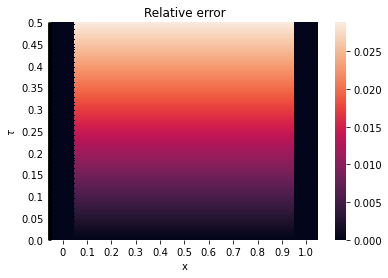

In [13]:
fig, ax4 = plt.subplots(nrows=1, ncols=1)
relative_error= np.absolute(analytical_m - matrix1)/np.maximum(np.absolute(analytical_m ),0.0001)
hm4ax = sns.heatmap(np.flip(relative_error, axis=0) , xticklabels = my_xticks, yticklabels=my_yticks, ax=ax4)
hm4ax.set_xlabel("x")
hm4ax.set_ylabel(r"$\tau$")
hm4ax.set_title("Relative error")
plt.show()

The approximation seems to deviate most from the analytical results the upper to middle part of the grid, i.e., the numerical error accumulates through time. At $\tau=0.5$, the relative error is more than 2.5\%.

We can also plot all heatmaps together as follows: 

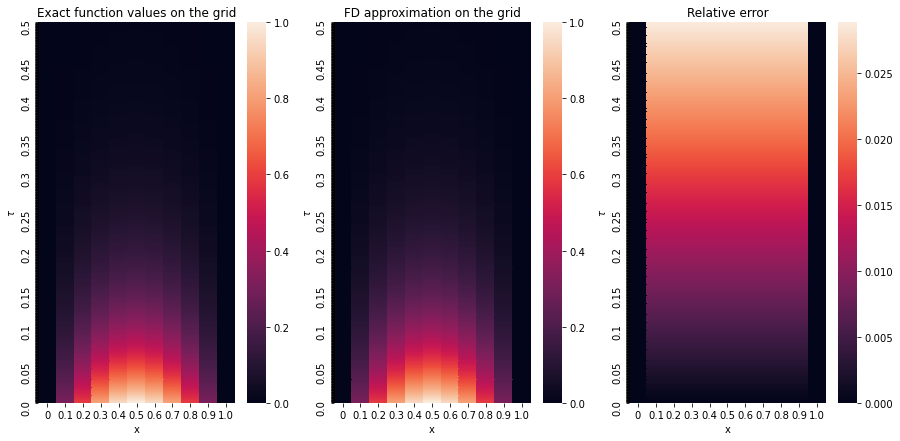

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 7))
axhm1 = sns.heatmap(np.flip(analytical_m,axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax1)
axhm1.set_xlabel("x")
axhm1.set_ylabel(r"$\tau$")
axhm1.set_title("Exact function values on the grid")

axhm2 = sns.heatmap(np.flip(matrix1,axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax2)
axhm2.set_xlabel("x")
axhm2.set_ylabel(r"$\tau$")
axhm2.set_title("FD approximation on the grid")


axhm3 = sns.heatmap(np.flip(relative_error, axis=0), xticklabels = my_xticks, yticklabels=my_yticks, ax=ax3)
axhm3.set_xlabel("x")
axhm3.set_ylabel(r"$\tau$")
axhm3.set_title("Relative error")
plt.show()

### Exercise 3

Suppose you would like to compute an approximation of $u$ at $(\tau, x)=(0.5, 0.2)$ using your Python code implementing the explicit finite difference scheme. Set $\Delta x = 0.1$. 
Hence, here $x_2 = 2 \Delta x = 0.2$. 
Now consider two different choices for $\Delta \tau$. 

1.Set $\Delta \tau = 0.0005$. Hence, here $\lambda = \Delta \tau / (\Delta x)^2 = 0.05$.  Compute an approximation of $u$ at $(\tau, x)=(0.5, 0.2)$. 
	
Hint: Note that here $\tau_{1000} = 1000 \Delta \tau = 0.5$.

2.Set $\Delta \tau = 0.01$. Hence, here $\lambda = \Delta \tau / (\Delta x)^2 = 1$. Compute an approximation of $u$ at $(\tau, x)=(0.5, 0.2)$.

Hint: Note that here $\tau_{50} = 50 \Delta \tau = 0.5$. 

3.Compare the values of both approximations and the analytical result. What do you observe? Discuss your results.  

### Exercise 3 - Solution

In [15]:
# Comparison for 
xmin = 0.0
deltax = 0.1
m = 10
whichx = 2

# and two different choices of deltatau
# Case 1: 
deltatau = 0.0005
whichtau = 1000
(approximation_point1, matrix1) = explicit_fd_matrix(deltatau, deltax, xmin, m, whichx, whichtau)
print("First approximation is (matrix)", approximation_point1)

# Case 2: 
deltatau = 0.01
whichtau = 50
(approximation_point2, matrix2) = explicit_fd_matrix(deltatau, deltax, xmin, m, whichx, whichtau)
print("Second approximation is (matrix)", approximation_point2)

First approximation is (matrix) 0.004349220987439514
Second approximation is (matrix) 347452.5961078501


We have seen in the lecture notes, that the explicit finite difference scheme is stable if and only if $0 < \Delta \tau \leq \frac{(\Delta x)^2}{2}$ which is equivalent to $0 < \lambda \leq \frac{1}{2}$ for $\lambda = \frac{\Delta \tau}{(\Delta x)^2}$. 

In the first case $\lambda = 0.05 \leq 1/2$ and hence the explicit FD scheme is stable. Indeed, the numerical approximation is very close to the analytical value. In the second case, $\lambda = 1 > 1/2$ and hence the FD is not stable. The numerical approximation explodes and does not give a suitable approximation of the function value. This shows the importance of choosing step sizes $\Delta x$ and $\Delta \tau$ such that the explicit finite difference scheme is stable. 